# Sensitivity Analaysis

In this file SOBOL will be used to see how all uncertainties effect the 3 chosen policies.



## 1. SOBOL
1. Import results from Open Exploration to get top 3 policies

In [1]:
from ema_workbench import load_results
import matplotlib.pyplot as plt
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Load previously saved results from the open exploration
results = load_results('dike_open_exploration_results.tar.gz')
experiments, outcomes = results

# Define metadata columns to remove
columns_to_drop = [
    'scenario', 'policy', 'model'
]

# Create a cleaned DataFrame containing only input parameters
cleaned_experiments = experiments.drop(columns=columns_to_drop)

In [2]:
# Show dataframe
cleaned_experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 0,A.3_DikeIncrease 1,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat
0,27,305.687148,1.5,0.027832,68.359127,1.5,0.152884,167.261300,10.0,0.345284,...,9,6,7,2,9,1,6,6,5,1
1,49,184.935658,1.5,0.144667,38.274603,1.5,0.807387,71.791046,1.0,0.262927,...,9,6,7,2,9,1,6,6,5,1
2,13,164.819438,10.0,0.767065,124.757598,1.0,0.255756,164.351654,1.0,0.596933,...,9,6,7,2,9,1,6,6,5,1
3,124,182.023088,1.0,0.595303,151.500057,1.5,0.644332,102.804731,1.0,0.680736,...,9,6,7,2,9,1,6,6,5,1
4,118,274.075171,1.0,0.766450,249.129695,1.5,0.156813,296.012131,1.0,0.281304,...,9,6,7,2,9,1,6,6,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274995,65,133.888803,10.0,0.290900,346.764144,1.0,0.144683,131.921561,1.0,0.890272,...,4,2,3,4,5,8,0,0,4,2
274996,123,88.754242,10.0,0.515894,320.261164,10.0,0.603532,163.144599,1.0,0.691465,...,4,2,3,4,5,8,0,0,4,2
274997,20,177.859906,1.5,0.670260,138.756215,10.0,0.351170,39.689428,1.0,0.303821,...,4,2,3,4,5,8,0,0,4,2
274998,32,201.286779,1.5,0.706167,178.042102,1.0,0.326051,342.924122,10.0,0.774295,...,4,2,3,4,5,8,0,0,4,2


In [3]:
import pandas as pd

# Convert outcomes dictionary to a pandas DataFrame
outcomes_pd = pd.DataFrame(outcomes)
outcomes_pd

,Expected Annual Damage,RfR Total Costs,Dike Investment Costs
0,6.221492e+06,1.365500e+09,5.353036e+08
1,0.000000e+00,1.365500e+09,5.353036e+08
2,1.571249e+06,1.365500e+09,5.353036e+08
3,0.000000e+00,1.365500e+09,5.353036e+08
4,9.136658e+06,1.365500e+09,5.353036e+08
...,...,...,...
274995,0.000000e+00,8.316000e+08,7.132246e+08
274996,0.000000e+00,8.316000e+08,7.132246e+08
274997,0.000000e+00,8.316000e+08,7.132246e+08
274998,0.000000e+00,8.316000e+08,7.132246e+08


In [4]:
# Join outcomes with experiments
tot = experiments.join(outcomes_pd)

# Filter the minimal costs
filtered = tot[tot['RfR Total Costs'] >= 1000000000]

# Group by policy and take the mean
tot_policy = filtered.groupby('policy').mean(numeric_only=True)

# Sort the policies in ascending way
tot_policy.sort_values(
    by=['RfR Total Costs', 'Dike Investment Costs', 'Expected Annual Damage'],
    ascending=[True, True, True],
    inplace=True
)

# Look at results
tot_policy


,A.0_ID flood wave shape,A.1_Bmax,A.1_pfail,A.2_Bmax,A.2_pfail,A.3_Bmax,A.3_pfail,A.4_Bmax,A.4_pfail,A.5_Bmax,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,Expected Annual Damage,RfR Total Costs,Dike Investment Costs
policy,,,,,,,,,,,,,,,,,,,,,
173,66.003,190.000267,0.499993,190.002726,0.499997,190.00238,0.499999,189.998236,0.499995,189.998417,...,6.0,8.0,4.0,0.0,6.0,2.0,3.0,1.264714e+08,1.000800e+09,4.036941e+08
49,66.003,190.000267,0.499993,190.002726,0.499997,190.00238,0.499999,189.998236,0.499995,189.998417,...,3.0,8.0,9.0,4.0,10.0,10.0,2.0,1.999356e+06,1.005200e+09,5.656770e+08
118,66.003,190.000267,0.499993,190.002726,0.499997,190.00238,0.499999,189.998236,0.499995,189.998417,...,10.0,5.0,2.0,0.0,4.0,10.0,2.0,4.249807e+07,1.006900e+09,4.142299e+08
190,66.003,190.000267,0.499993,190.002726,0.499997,190.00238,0.499999,189.998236,0.499995,189.998417,...,6.0,3.0,3.0,0.0,2.0,2.0,1.0,2.665384e+06,1.006900e+09,4.595225e+08
208,66.003,190.000267,0.499993,190.002726,0.499997,190.00238,0.499999,189.998236,0.499995,189.998417,...,0.0,0.0,9.0,2.0,3.0,2.0,2.0,3.589047e+07,1.012800e+09,4.422576e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Show the three top policies
top3_policy_names = tot_policy.index[:3].tolist()
top3_policy_names

[173, 49, 118]

In [6]:
# List of lever column names used in the model
lever_columns = [
    '0_RfR 0', '0_RfR 1', '0_RfR 2',
    '1_RfR 0', '1_RfR 1', '1_RfR 2',
    '2_RfR 0', '2_RfR 1', '2_RfR 2',
    '3_RfR 0', '3_RfR 1', '3_RfR 2',
    '4_RfR 0', '4_RfR 1', '4_RfR 2',
    'EWS_DaysToThreat',
    'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
    'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
    'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
    'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
    'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2'
]

In [7]:
from ema_workbench import Policy

# Select top 3 rows
top3_df = tot_policy.iloc[:3]

# Select all columns that are levers
lever_columns = [col for col in top3_df.columns if col in lever_columns]

# Make dictionary per policy
top3_policies = []
for idx, row in top3_df.iterrows():
    lever_dict = {col: row[col] for col in lever_columns}
    policy = Policy(str(idx), **lever_dict)
    top3_policies.append(policy)

top3_policies

[Policy({'0_RfR 0': 1.0, '0_RfR 1': 1.0, '0_RfR 2': 1.0, '1_RfR 0': 1.0, '1_RfR 1': 0.0, '1_RfR 2': 0.0, '2_RfR 0': 0.0, '2_RfR 1': 0.0, '2_RfR 2': 1.0, '3_RfR 0': 1.0, '3_RfR 1': 1.0, '3_RfR 2': 0.0, '4_RfR 0': 1.0, '4_RfR 1': 0.0, '4_RfR 2': 0.0, 'A.1_DikeIncrease 0': 7.0, 'A.1_DikeIncrease 1': 5.0, 'A.1_DikeIncrease 2': 10.0, 'A.2_DikeIncrease 0': 0.0, 'A.2_DikeIncrease 1': 0.0, 'A.2_DikeIncrease 2': 2.0, 'A.3_DikeIncrease 0': 2.0, 'A.3_DikeIncrease 1': 3.0, 'A.3_DikeIncrease 2': 5.0, 'A.4_DikeIncrease 0': 6.0, 'A.4_DikeIncrease 1': 8.0, 'A.4_DikeIncrease 2': 4.0, 'A.5_DikeIncrease 0': 0.0, 'A.5_DikeIncrease 1': 6.0, 'A.5_DikeIncrease 2': 2.0, 'EWS_DaysToThreat': 3.0}),
 Policy({'0_RfR 0': 1.0, '0_RfR 1': 0.0, '0_RfR 2': 1.0, '1_RfR 0': 1.0, '1_RfR 1': 1.0, '1_RfR 2': 1.0, '2_RfR 0': 1.0, '2_RfR 1': 0.0, '2_RfR 2': 1.0, '3_RfR 0': 1.0, '3_RfR 1': 0.0, '3_RfR 2': 0.0, '4_RfR 0': 0.0, '4_RfR 1': 0.0, '4_RfR 2': 0.0, 'A.1_DikeIncrease 0': 6.0, 'A.1_DikeIncrease 1': 1.0, 'A.1_DikeIncrea

2. Import model

In [8]:
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
)

from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation2 import get_model_for_problem_formulation, sum_over, sum_over_time

# Set up EMA Workbench to display logging information in the console
ema_logging.log_to_stderr(ema_logging.INFO)

# Select problem formulation (0 to 4), each corresponding to a different regional case or aggregation method:
# 0: Veluwe (custom formulation)
# 1: Veluwe with combined cost outcomes
# 2: Zutphen
# 3: Doesburg & Cortenoever
# 4: Overijssel
dike_model, planning_steps = get_model_for_problem_formulation(0)

In [9]:
from ema_workbench import MultiprocessingEvaluator, ema_logging
from ema_workbench import Samplers

ema_logging.log_to_stderr(ema_logging.INFO)

# Process the model
with MultiprocessingEvaluator(dike_model, n_processes=-2) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(128, top3_policies,
                                                         uncertainty_sampling=Samplers.SOBOL)

[MainProcess/INFO] pool started with 8 workers
[MainProcess/INFO] performing 5120 scenarios * 3 policies * 1 model(s) = 15360 experiments
100%|████████████████████████████████████| 15360/15360 [05:13<00:00, 49.04it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


3. Sensitivity indexes

We will create a sensitivity index plot, displaying the S1 (First-order) and ST (Total-order) sensitivity indexes, to compare the influence of input parameters on the three outcomes across three release policies. This will provide insights into the importance of different uncertainties under each policy.\

In [10]:
from SALib.analyze.sobol import analyze
from SALib.analyze import sobol
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
import seaborn as sns

# Define the problem
problem = get_SALib_problem(dike_model.uncertainties)

#### 1. RFR Total Cost

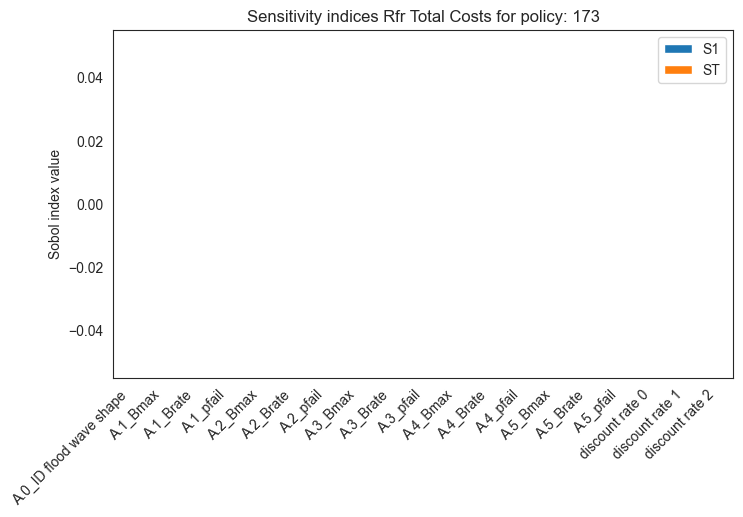

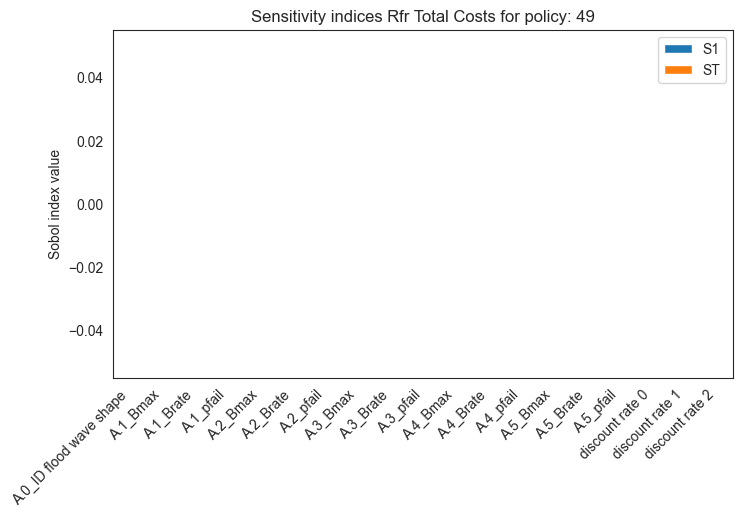

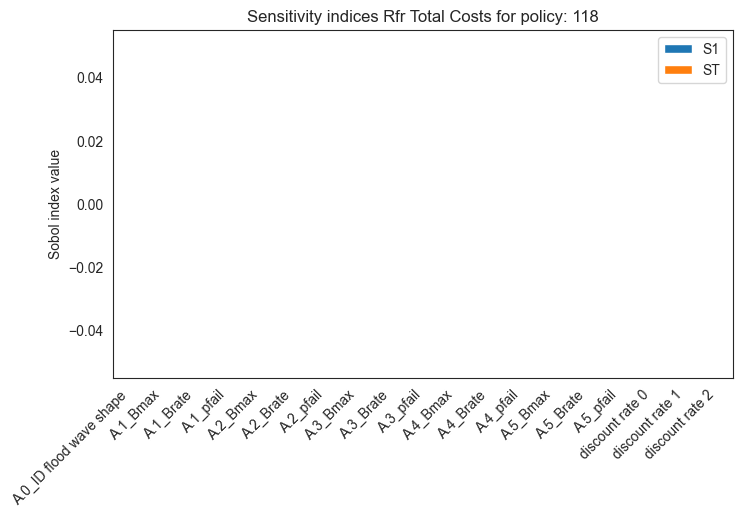

In [11]:
sobol_results = {}

# Loop over top policies and compute Sobol indices
for policy in top3_policy_names:
    logical = experiments.policy == str(policy)
    y = outcomes['RfR Total Costs'][logical]

    # Run Sobol analysis
    Si = sobol.analyze(problem, y, calc_second_order=True, print_to_console=False)
    sobol_results[str(policy)] = Si

    # Filter and structure the results
    scores_filtered = {k: Si[k] for k in ["ST", "ST_conf", "S1", "S1_conf"]}
    Si_df = pd.DataFrame(scores_filtered, index=problem["names"])

    # Plot
    sns.set_style("white")
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))

    indices = Si_df[["S1", "ST"]]
    errors = Si_df[["S1_conf", "ST_conf"]]

    indices.plot.bar(yerr=errors.values.T, ax=ax, capsize=4)
    ax.set_title(f"Sensitivity indices Rfr Total Costs for policy: {policy}")
    ax.set_ylabel("Sobol index value")
    ax.set_xticklabels(Si_df.index, rotation=45, ha='right')
    fig.subplots_adjust(bottom=0.3)
    plt.show()

#### 2. Expected Annual Damage


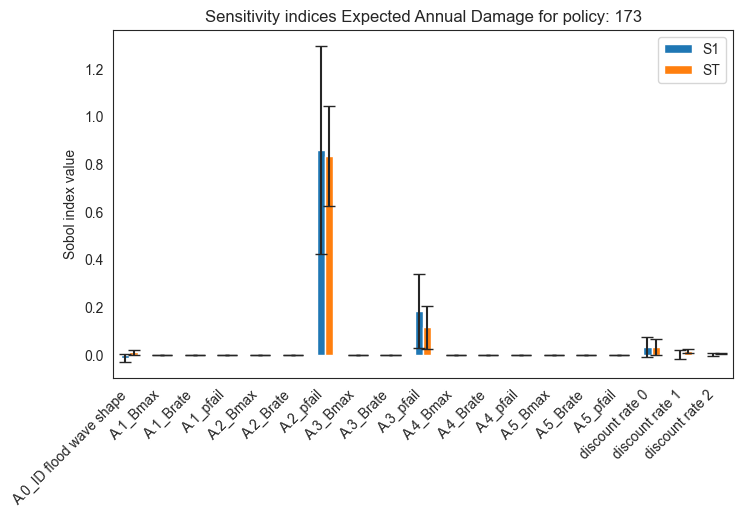

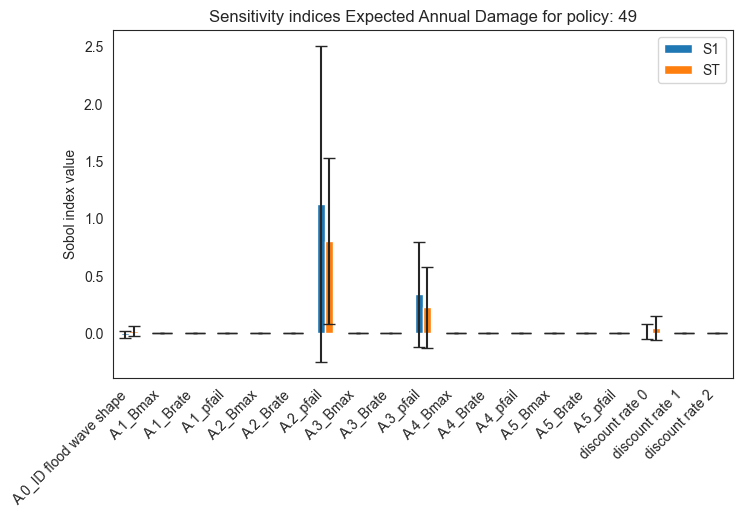

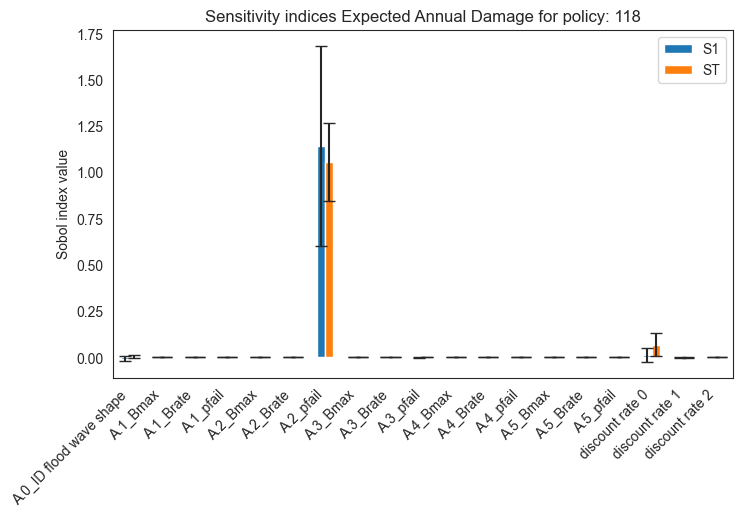

In [12]:
sobol_results = {}

# Loop over top policies and compute Sobol indices
for policy in top3_policy_names:
    logical = experiments.policy == str(policy)
    y = outcomes['Expected Annual Damage'][logical]

    # Run Sobol analysis
    Si = sobol.analyze(problem, y, calc_second_order=True, print_to_console=False)
    sobol_results[str(policy)] = Si

    # Filter and structure the results
    scores_filtered = {k: Si[k] for k in ["ST", "ST_conf", "S1", "S1_conf"]}
    Si_df = pd.DataFrame(scores_filtered, index=problem["names"])

    # Plot
    sns.set_style("white")
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))

    indices = Si_df[["S1", "ST"]]
    errors = Si_df[["S1_conf", "ST_conf"]]

    indices.plot.bar(yerr=errors.values.T, ax=ax, capsize=4)
    ax.set_title(f"Sensitivity indices Expected Annual Damage for policy: {policy}")
    ax.set_ylabel("Sobol index value")
    ax.set_xticklabels(Si_df.index, rotation=45, ha='right')
    fig.subplots_adjust(bottom=0.3)
    plt.show()

#### 3. Dike Investment Costs

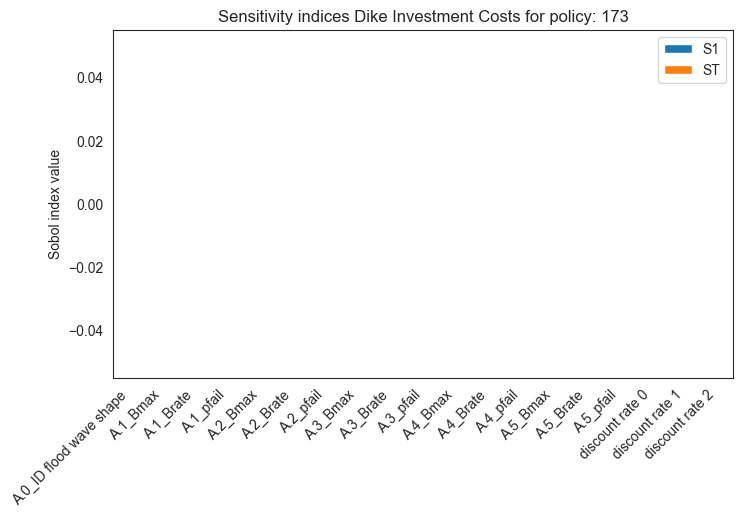

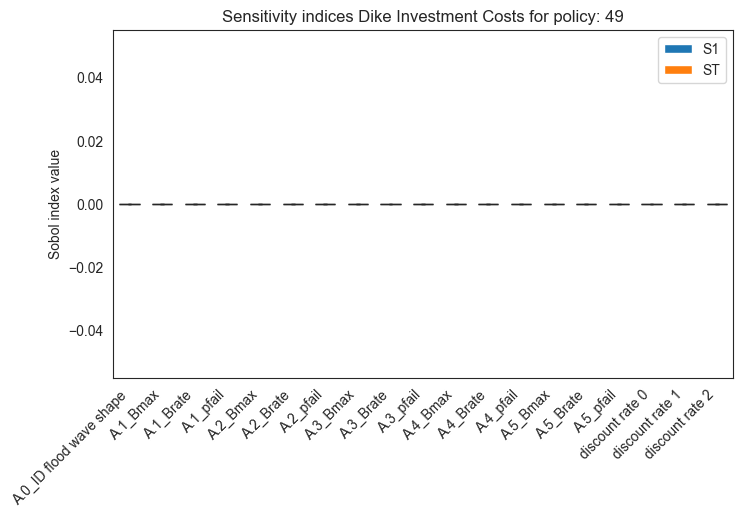

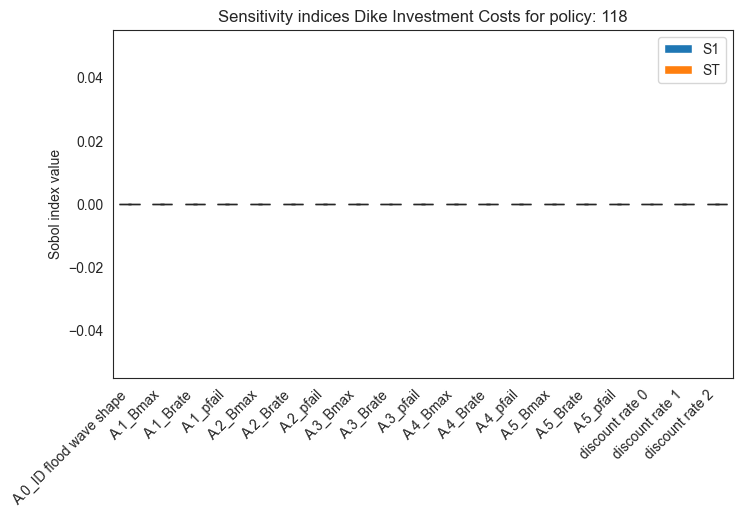

In [13]:
sobol_results = {}

# Loop over top policies and compute Sobol indices
for policy in top3_policy_names:
    logical = experiments.policy == str(policy)
    y = outcomes['Dike Investment Costs'][logical]

    # Run Sobol analysis
    Si = sobol.analyze(problem, y, calc_second_order=True, print_to_console=False)
    sobol_results[str(policy)] = Si

    # Filter and structure the results
    scores_filtered = {k: Si[k] for k in ["ST", "ST_conf", "S1", "S1_conf"]}
    Si_df = pd.DataFrame(scores_filtered, index=problem["names"])

    # Plot
    sns.set_style("white")
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))

    indices = Si_df[["S1", "ST"]]
    errors = Si_df[["S1_conf", "ST_conf"]]

    indices.plot.bar(yerr=errors.values.T, ax=ax, capsize=4)
    ax.set_title(f"Sensitivity indices Dike Investment Costs for policy: {policy}")
    ax.set_ylabel("Sobol index value")
    ax.set_xticklabels(Si_df.index, rotation=45, ha='right')
    fig.subplots_adjust(bottom=0.3)
    plt.show()

## 2. Feature scoring
Now the three policies will be analysed using Feature Scoring. Feature scoring uses machine learning to rank input uncertainties by their impact on model outputs, an efficient way to assess parameter importance. The findings will be visualized with seaborn heatmaps to show feature importance under three different policies.

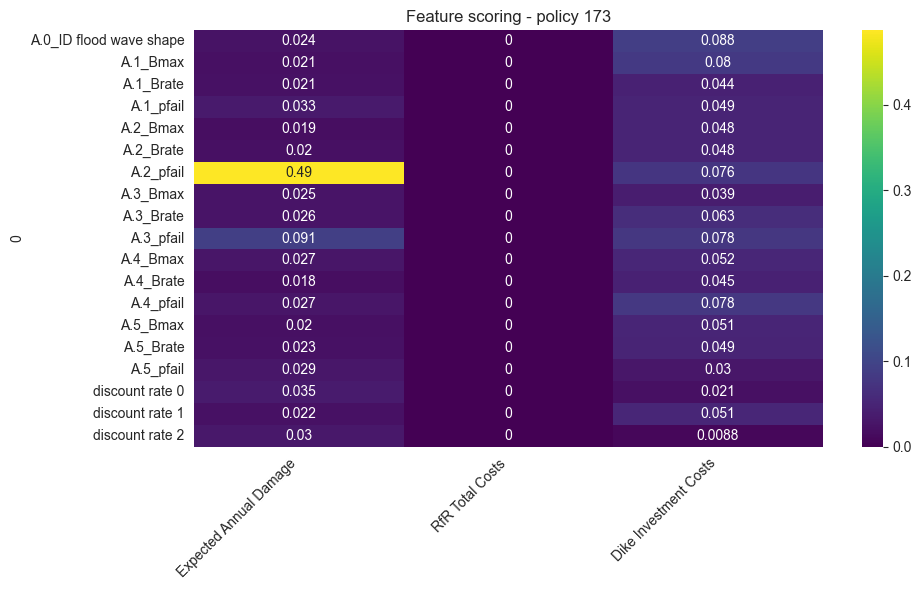

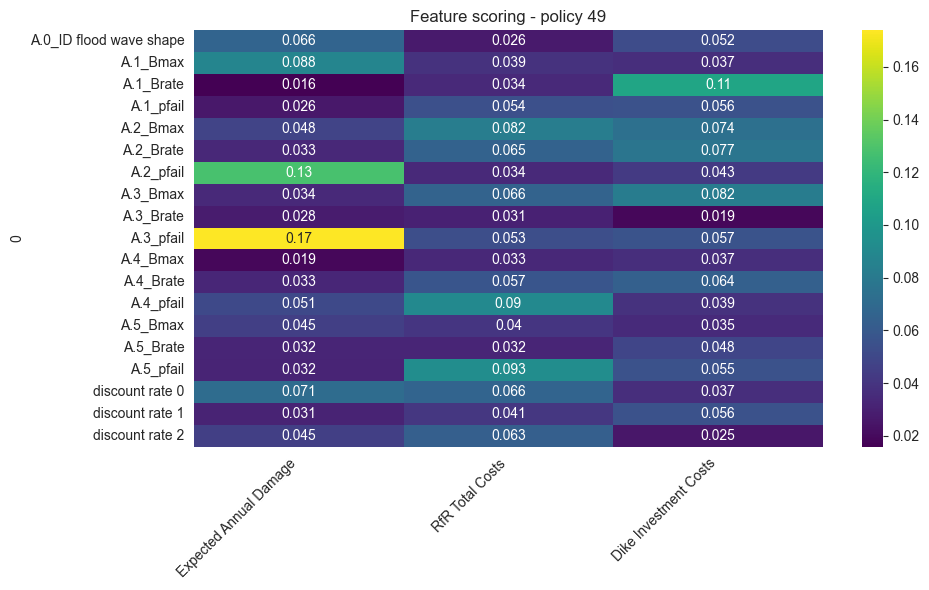

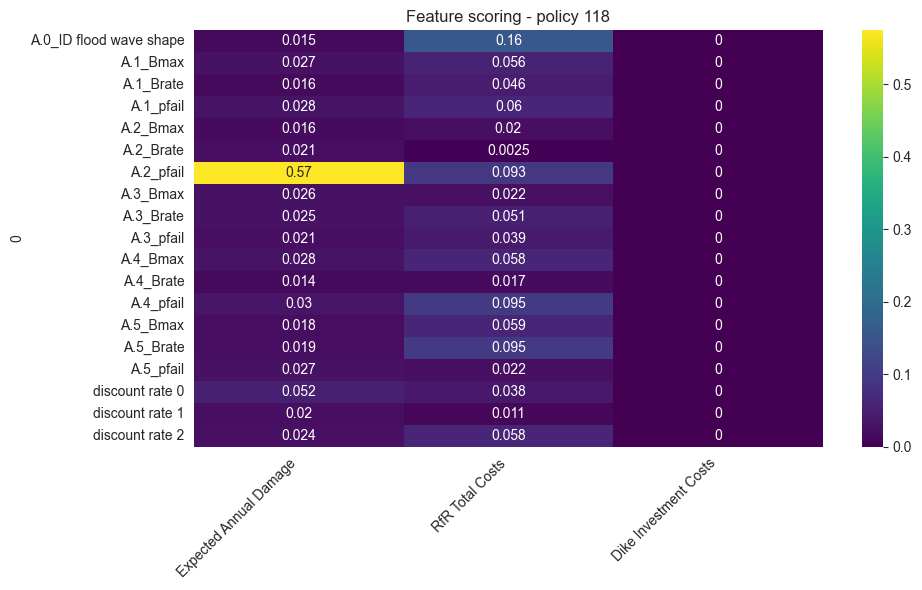

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from ema_workbench.analysis import feature_scoring

# Drop levers from experiments
cleaned_experiments = experiments.drop(columns=[l.name for l in dike_model.levers])

# Loop only through top 3 policies
for policy in top3_policy_names:
    logical = experiments.policy == str(policy)

    # Subset results for current policy
    subset_results = {k: v[logical] for k, v in outcomes.items()}

    # Feature scoring
    scores = feature_scoring.get_feature_scores_all(
        cleaned_experiments[logical],
        subset_results
    )

    # Heatmap plot
    sns.set_style("white")
    plt.figure(figsize=(10, 6))
    sns.heatmap(scores, annot=True, cmap='viridis')
    plt.title(f"Feature scoring - policy {policy}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()